## Anomaly Detection of Time Series Pump Sensor Data

We will be using the sensor data of pump in order to detect anomalies in it.
Dataset used can be downloaded from kaggle link mentioned : https://www.kaggle.com/datasets/nphantawee/pump-sensor-data

### Exploratory Data Analysis

#### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set(style = 'whitegrid', font_scale = 1.5)
%matplotlib inline
plt.rcParams['figure.figsize'] = [12,8]

#### Importing the dataset

In [2]:
sensor_df = pd.read_csv(r'F:\DATA SCIENCE\TIME SERIES\sensor.csv')

#### Basic Exploration

In [3]:
sensor_df.shape

(220320, 55)

In [4]:
print('The dataset has',sensor_df.shape[0],'rows and',sensor_df.shape[1],'columns.')

The dataset has 220320 rows and 55 columns.


In [5]:
# First five and Last five rows of the dataset
sensor_df

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.211800,46.397570,638.888900,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.168400,46.397568,628.125000,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.211800,46.397568,636.458300,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220315,220315,2018-08-31 23:55:00,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,...,38.28125,68.287030,52.37268,48.32176,41.087960,212.3843,153.64580,NaN,231.1921,NORMAL
220316,220316,2018-08-31 23:56:00,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,...,38.28125,66.840280,50.63657,48.03241,40.798610,213.8310,156.25000,NaN,231.1921,NORMAL
220317,220317,2018-08-31 23:57:00,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,...,39.06250,65.393520,48.90046,48.03241,40.798610,217.3032,155.38190,NaN,232.0602,NORMAL
220318,220318,2018-08-31 23:58:00,2.406366,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,...,40.62500,64.236110,47.74306,48.32176,40.509258,222.5116,153.93520,NaN,234.0856,NORMAL


In [6]:
# Number of valid data points and data types of each column of the pump sensor data
sensor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 55 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      220320 non-null  int64  
 1   timestamp       220320 non-null  object 
 2   sensor_00       210112 non-null  float64
 3   sensor_01       219951 non-null  float64
 4   sensor_02       220301 non-null  float64
 5   sensor_03       220301 non-null  float64
 6   sensor_04       220301 non-null  float64
 7   sensor_05       220301 non-null  float64
 8   sensor_06       215522 non-null  float64
 9   sensor_07       214869 non-null  float64
 10  sensor_08       215213 non-null  float64
 11  sensor_09       215725 non-null  float64
 12  sensor_10       220301 non-null  float64
 13  sensor_11       220301 non-null  float64
 14  sensor_12       220301 non-null  float64
 15  sensor_13       220301 non-null  float64
 16  sensor_14       220299 non-null  float64
 17  sensor_15 

In [7]:
sensor_df.columns[3]

'sensor_01'

In [8]:
# Percentage of valid data points present in each column
for i in range(sensor_df.shape[1]):
    print('Percentage of Null Values present in',sensor_df.columns[i],'column is',round((sensor_df.iloc[:,i].isnull().sum()/len(sensor_df.iloc[:,i]))*100,2),'%')

Percentage of Null Values present in Unnamed: 0 column is 0.0 %
Percentage of Null Values present in timestamp column is 0.0 %
Percentage of Null Values present in sensor_00 column is 4.63 %
Percentage of Null Values present in sensor_01 column is 0.17 %
Percentage of Null Values present in sensor_02 column is 0.01 %
Percentage of Null Values present in sensor_03 column is 0.01 %
Percentage of Null Values present in sensor_04 column is 0.01 %
Percentage of Null Values present in sensor_05 column is 0.01 %
Percentage of Null Values present in sensor_06 column is 2.18 %
Percentage of Null Values present in sensor_07 column is 2.47 %
Percentage of Null Values present in sensor_08 column is 2.32 %
Percentage of Null Values present in sensor_09 column is 2.09 %
Percentage of Null Values present in sensor_10 column is 0.01 %
Percentage of Null Values present in sensor_11 column is 0.01 %
Percentage of Null Values present in sensor_12 column is 0.01 %
Percentage of Null Values present in sens

In [9]:
# Getting percentage of Null Values in descending order for easy visulalization
(sensor_df.isnull().sum().sort_values(ascending = False)/len(sensor_df))*100

sensor_15         100.000000
sensor_50          34.956881
sensor_51           6.982117
sensor_00           4.633261
sensor_07           2.474129
sensor_08           2.317992
sensor_06           2.177741
sensor_09           2.085603
sensor_01           0.167484
sensor_30           0.118464
sensor_29           0.032680
sensor_32           0.030864
sensor_17           0.020879
sensor_18           0.020879
sensor_22           0.018609
sensor_25           0.016340
sensor_16           0.014070
sensor_42           0.012255
sensor_41           0.012255
sensor_49           0.012255
sensor_48           0.012255
sensor_47           0.012255
sensor_46           0.012255
sensor_38           0.012255
sensor_39           0.012255
sensor_45           0.012255
sensor_44           0.012255
sensor_40           0.012255
sensor_43           0.012255
sensor_14           0.009532
sensor_26           0.009078
sensor_10           0.008624
sensor_02           0.008624
sensor_03           0.008624
sensor_04     

#### Data Cleaning

In [10]:
# no values for sensor_15 and unnamed column is unnecessary
sensor_df.drop(['sensor_15','Unnamed: 0'], inplace = True, axis = 1)
sensor_df.head()

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [11]:
# too many values missing for sensor_50
sensor_df.drop(['sensor_50'], inplace = True, axis = 1)
sensor_df.head()

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51,machine_status
0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889,NORMAL
1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889,NORMAL
2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,...,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,203.7037,NORMAL
3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,...,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,203.1250,NORMAL
4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,...,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,201.3889,NORMAL


In [12]:
# convert time into index
sensor_df['index'] = pd.to_datetime(sensor_df['timestamp'])
sensor_df.index = sensor_df['index']

In [13]:
# drop index and timestamp columns
sensor_df.drop(['index','timestamp'], inplace = True, axis = 1)
sensor_df.head()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51,machine_status
index,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889,NORMAL
2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889,NORMAL
2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,...,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,203.7037,NORMAL
2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,...,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,203.1250,NORMAL
2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,...,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,201.3889,NORMAL


#### Dealing with missing values

In [14]:
# imputing missing values with mean

sensor_df.fillna(sensor_df.mean(), inplace = True)
sensor_df.isnull().sum()

sensor_00         0
sensor_01         0
sensor_02         0
sensor_03         0
sensor_04         0
sensor_05         0
sensor_06         0
sensor_07         0
sensor_08         0
sensor_09         0
sensor_10         0
sensor_11         0
sensor_12         0
sensor_13         0
sensor_14         0
sensor_16         0
sensor_17         0
sensor_18         0
sensor_19         0
sensor_20         0
sensor_21         0
sensor_22         0
sensor_23         0
sensor_24         0
sensor_25         0
sensor_26         0
sensor_27         0
sensor_28         0
sensor_29         0
sensor_30         0
sensor_31         0
sensor_32         0
sensor_33         0
sensor_34         0
sensor_35         0
sensor_36         0
sensor_37         0
sensor_38         0
sensor_39         0
sensor_40         0
sensor_41         0
sensor_42         0
sensor_43         0
sensor_44         0
sensor_45         0
sensor_46         0
sensor_47         0
sensor_48         0
sensor_49         0
sensor_51         0


#### E.D.A

In [15]:
sensor_df.machine_status.value_counts()

NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: machine_status, dtype: int64

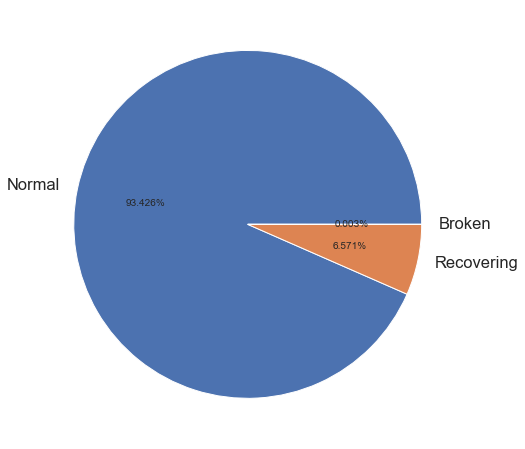

In [16]:
# machine status - pie chart

stroke_labels = ['Normal', 'Recovering', 'Broken']

sizes = sensor_df.machine_status.value_counts()

plt.pie(x = sizes, autopct = '%1.3f%%', labels = stroke_labels)

plt.show()

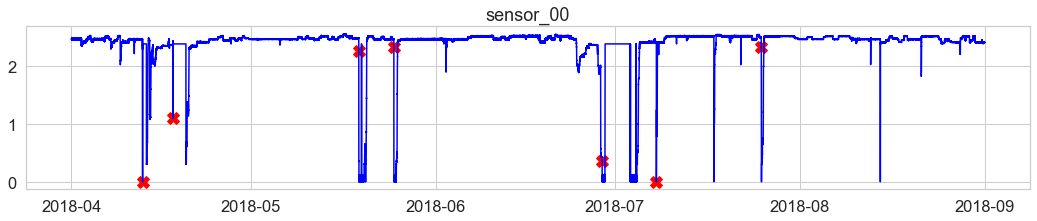

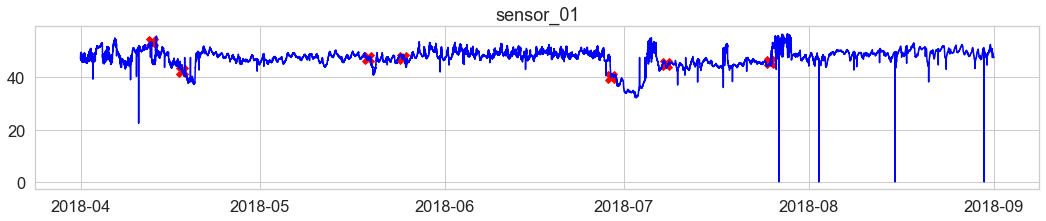

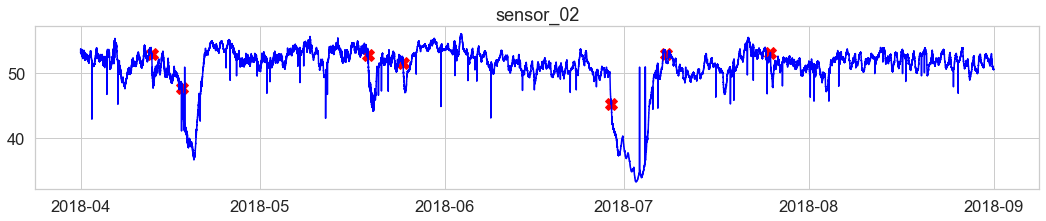

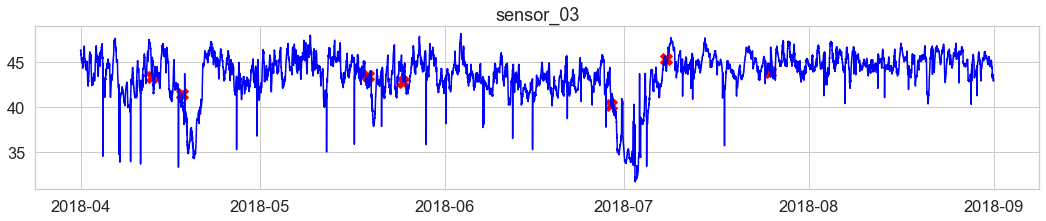

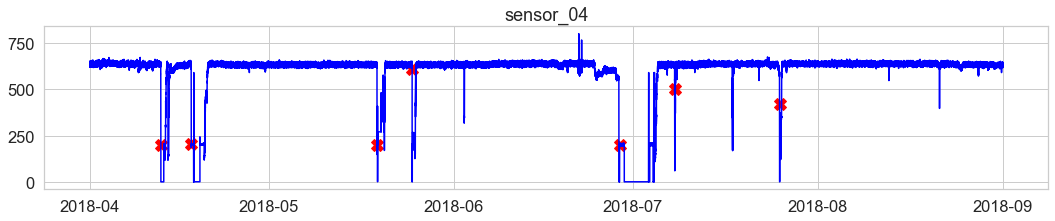

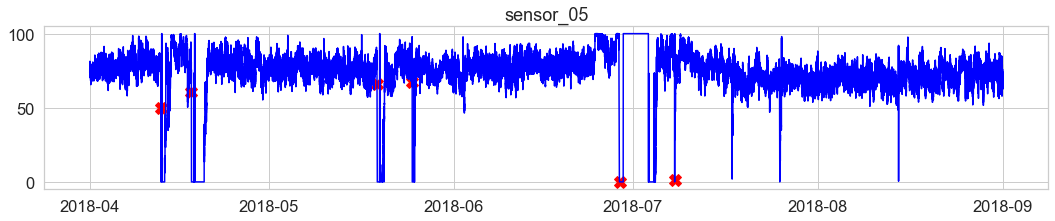

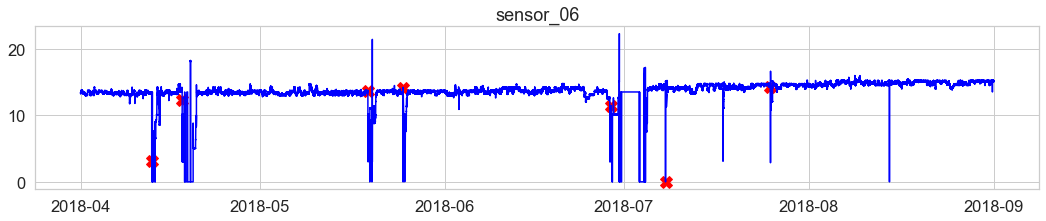

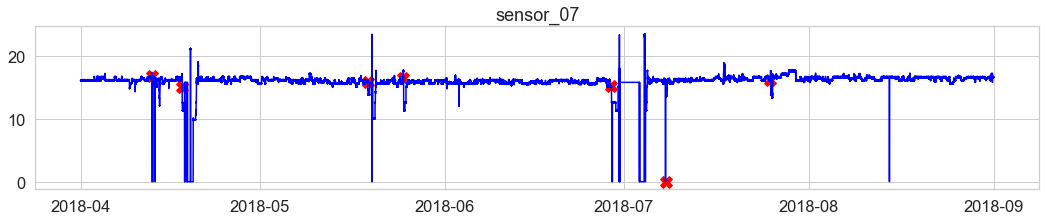

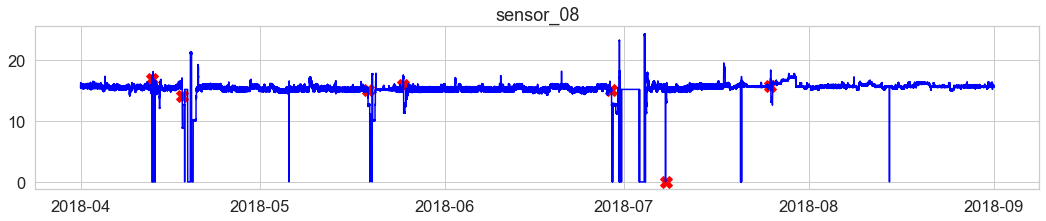

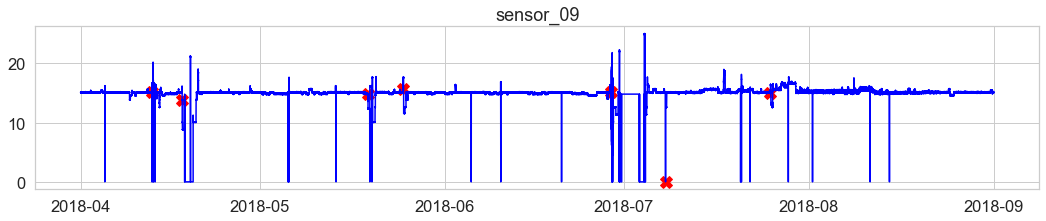

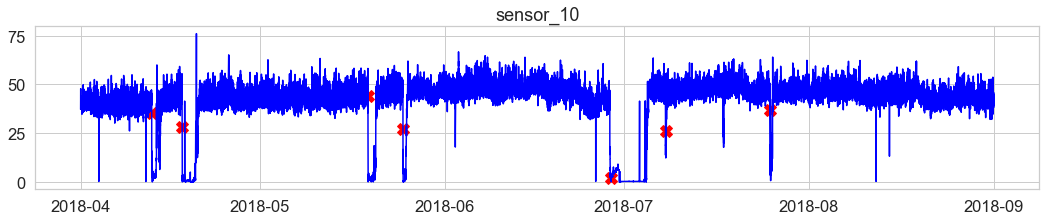

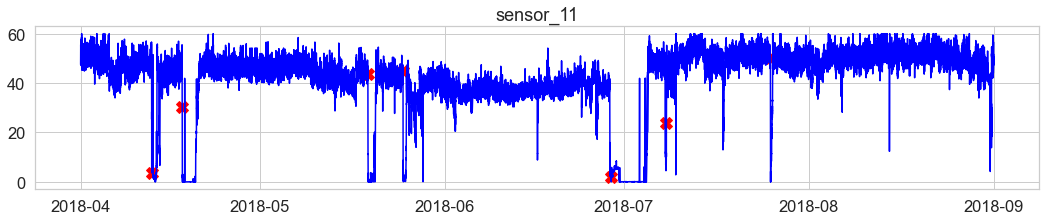

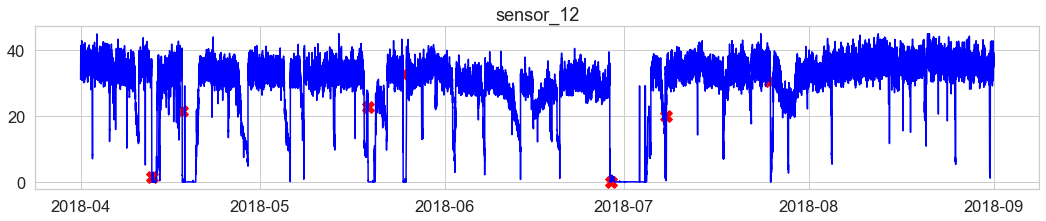

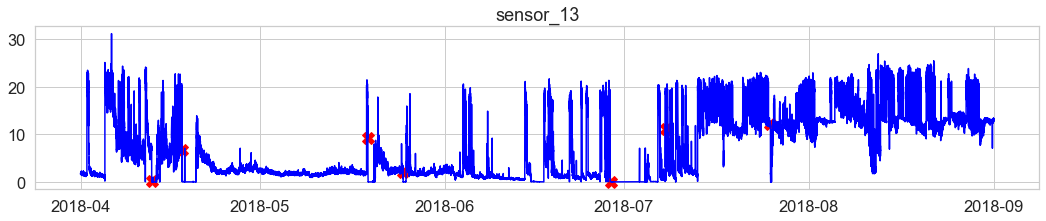

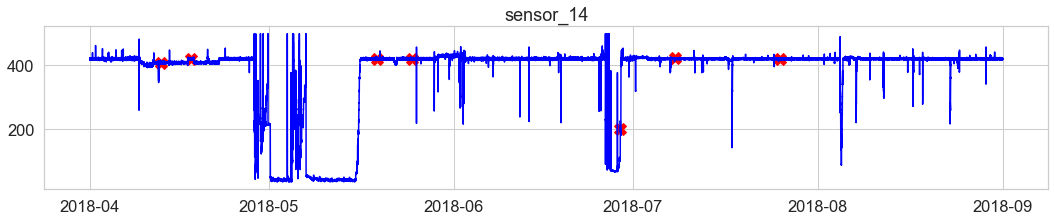

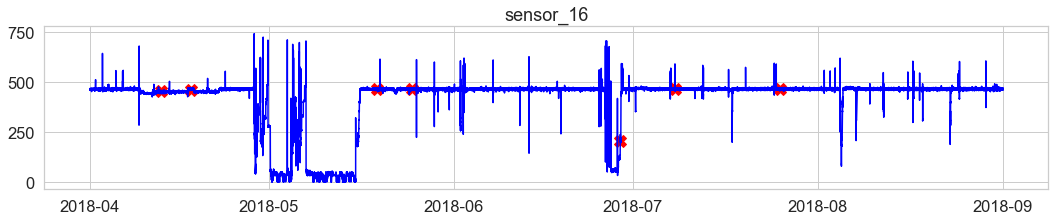

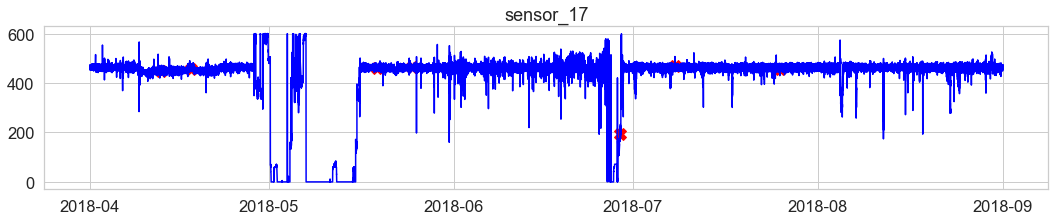

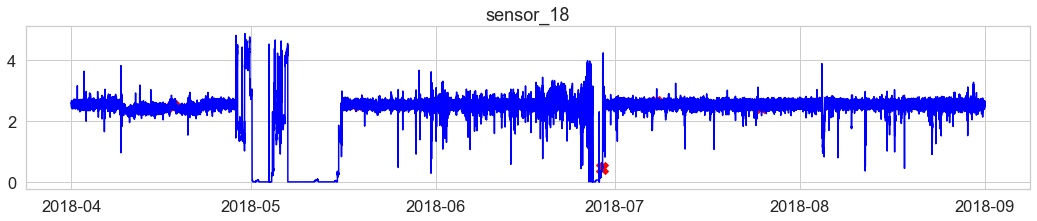

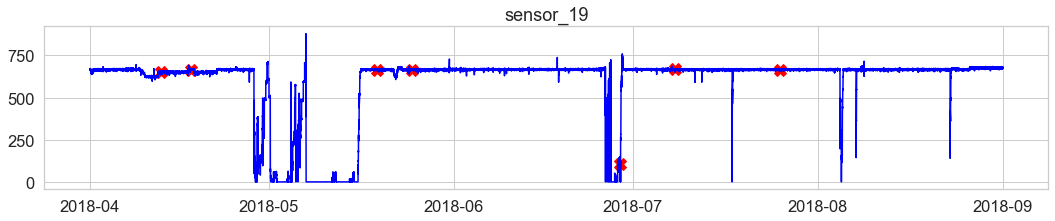

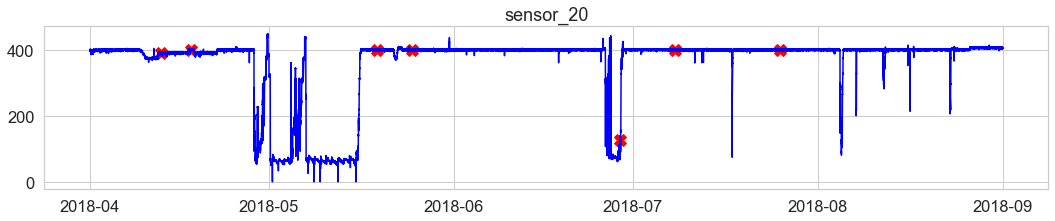

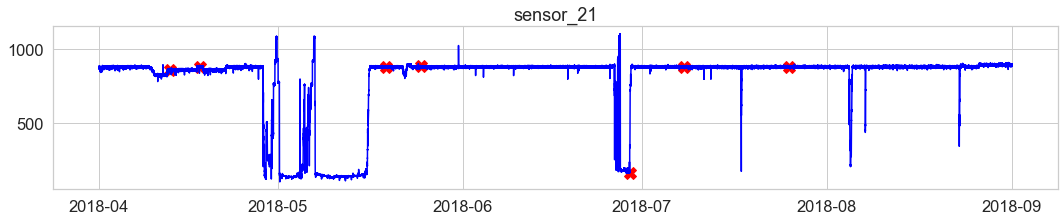

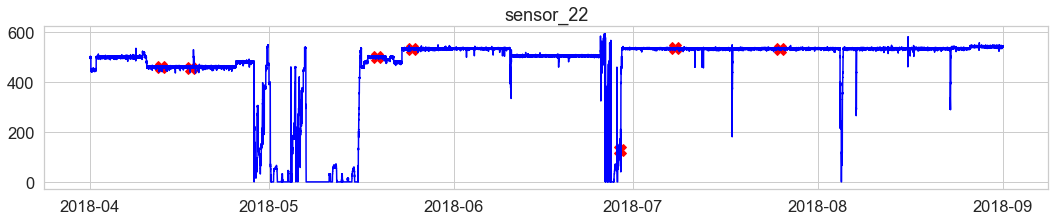

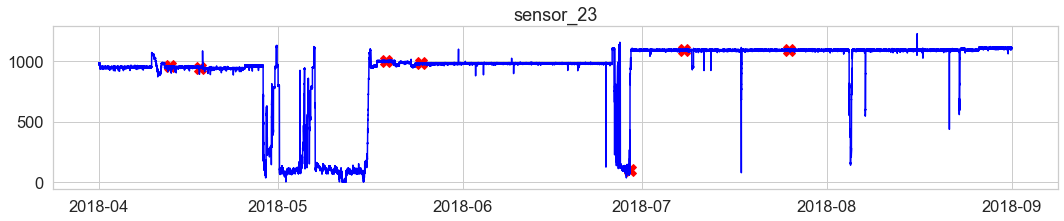

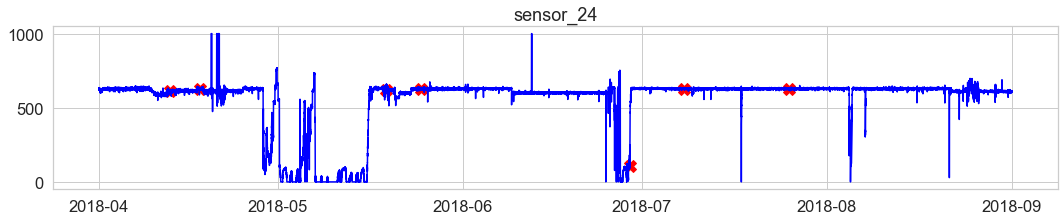

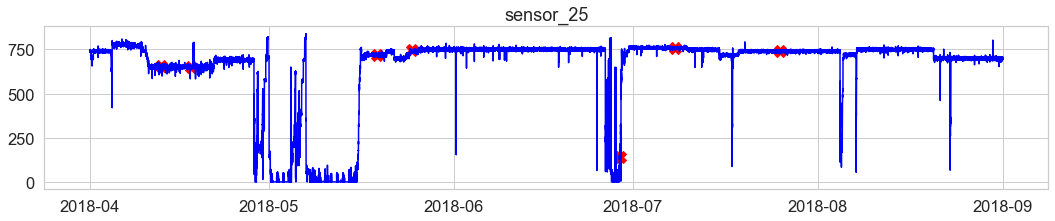

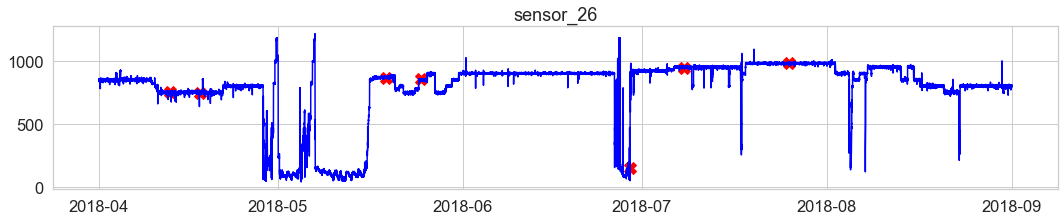

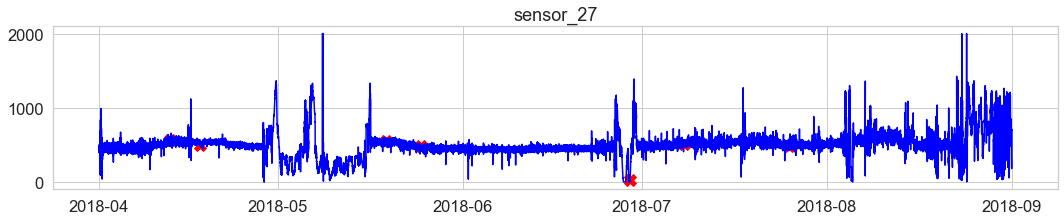

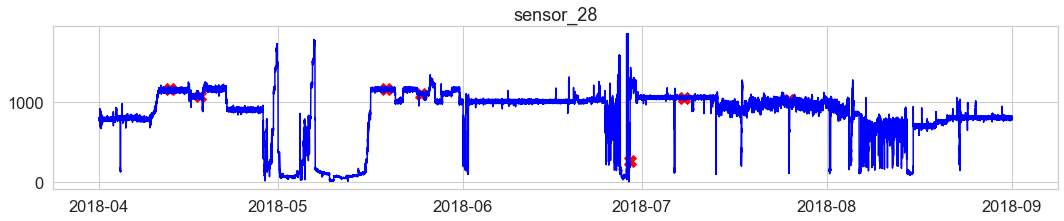

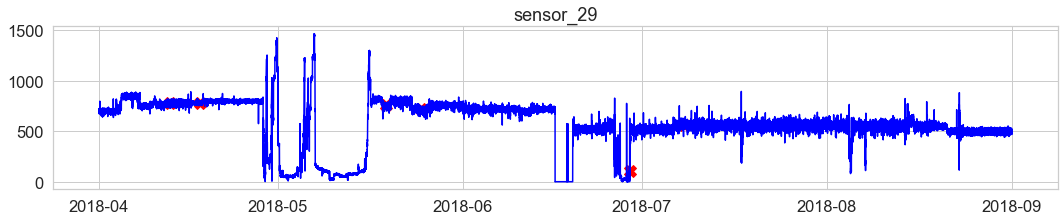

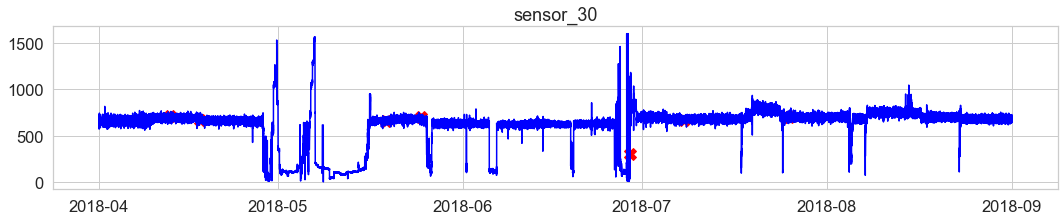

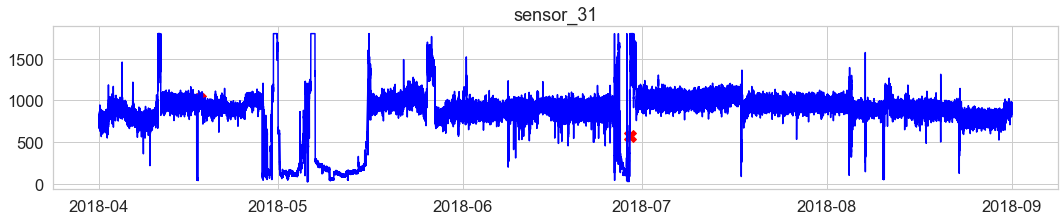

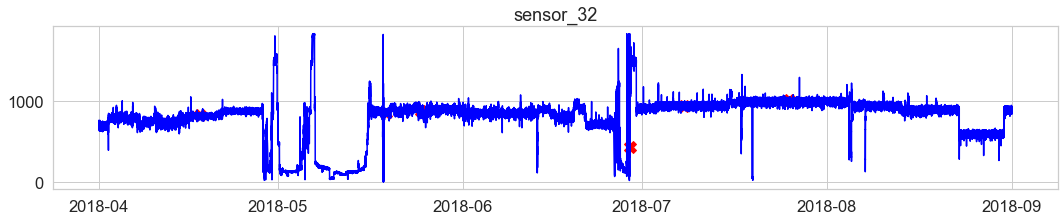

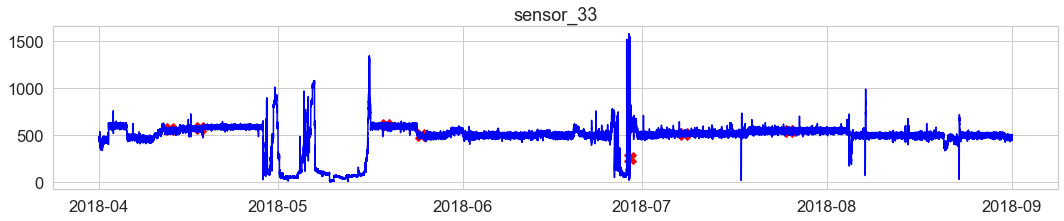

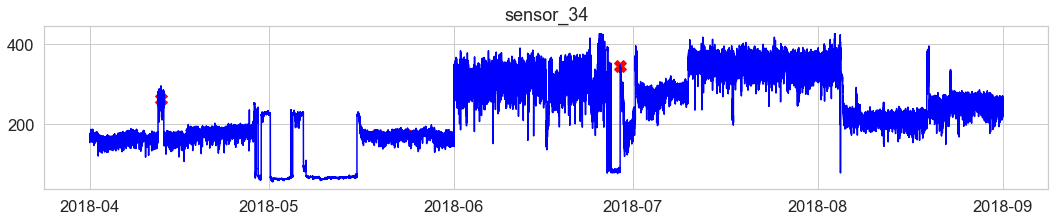

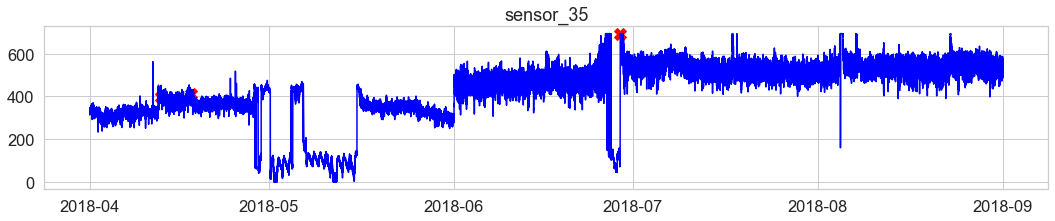

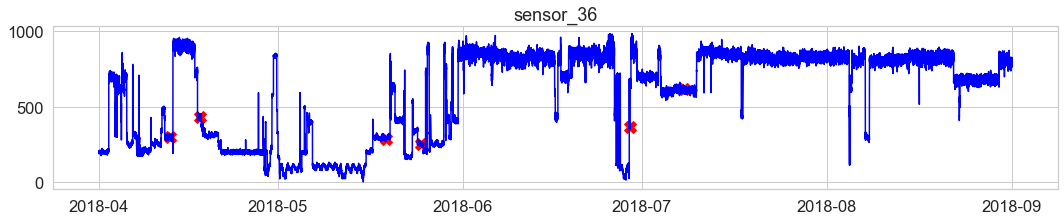

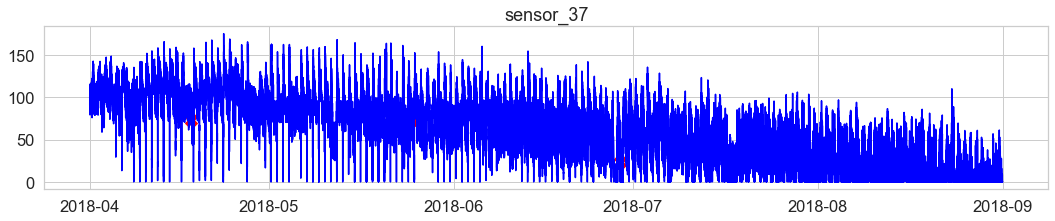

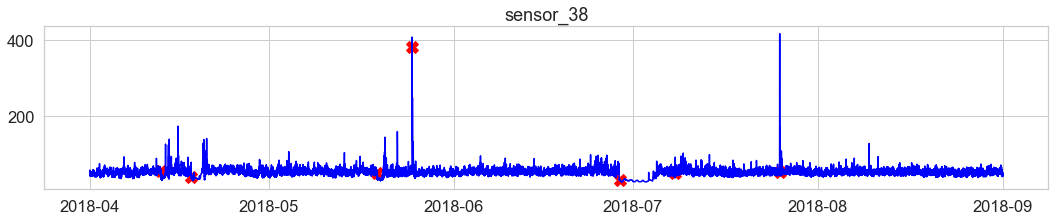

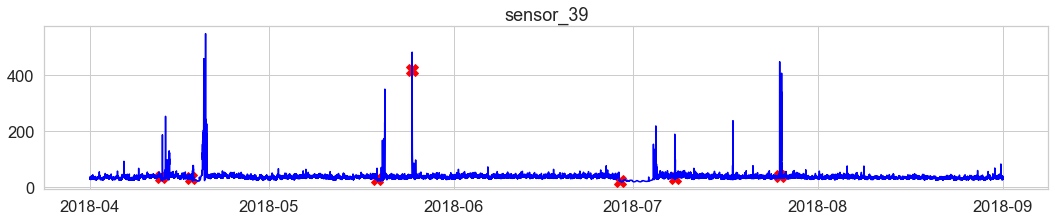

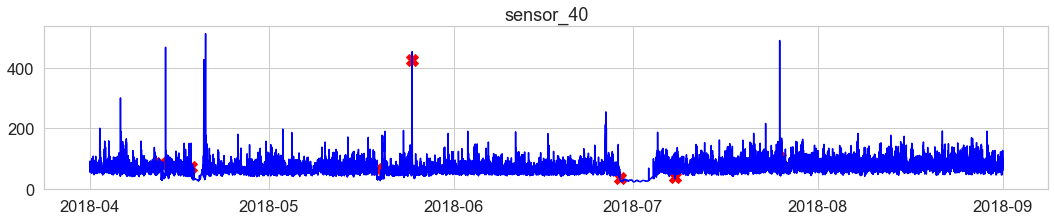

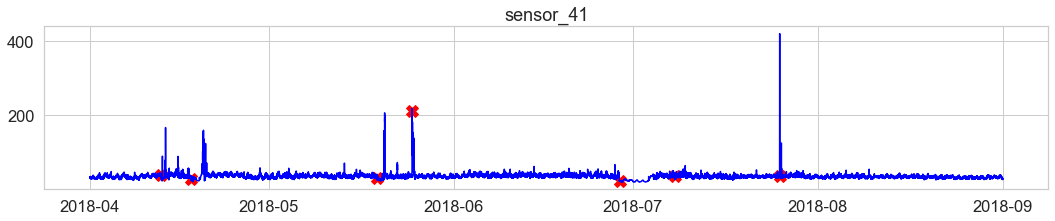

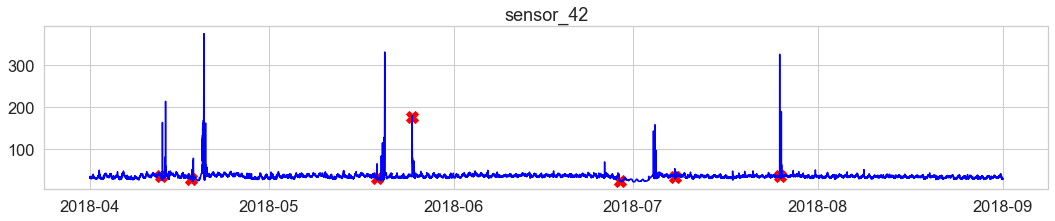

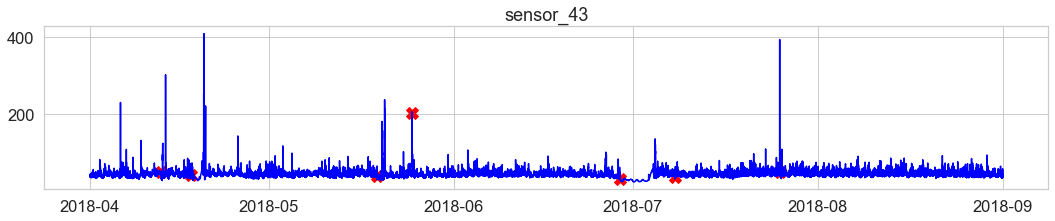

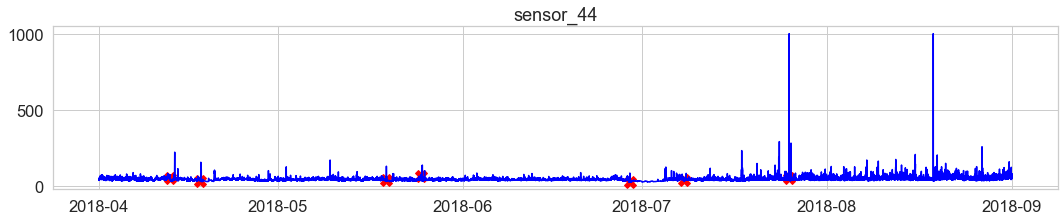

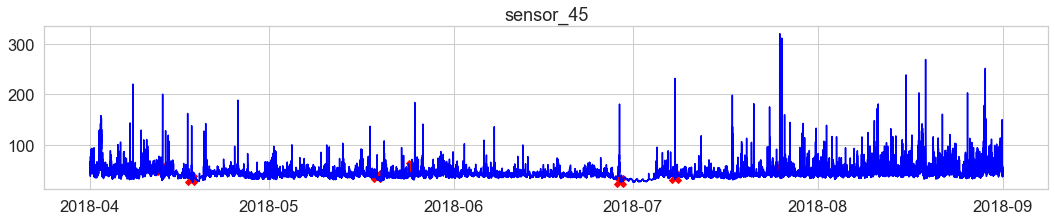

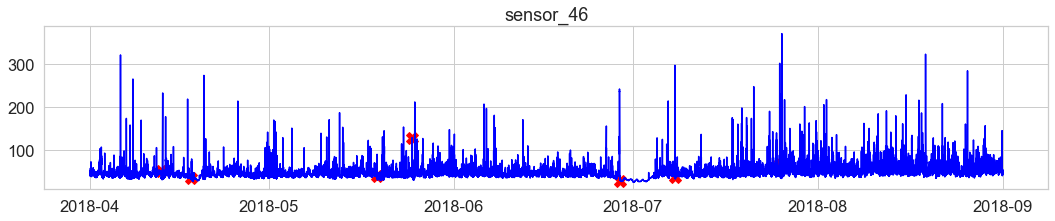

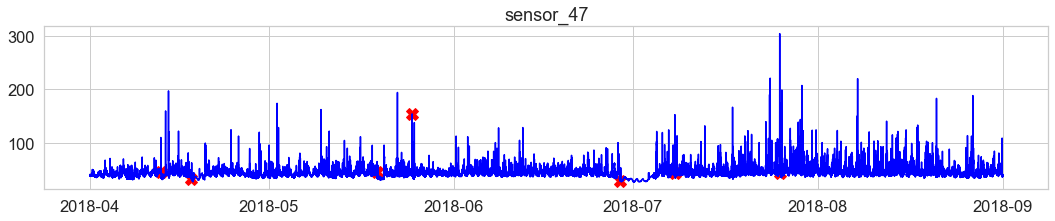

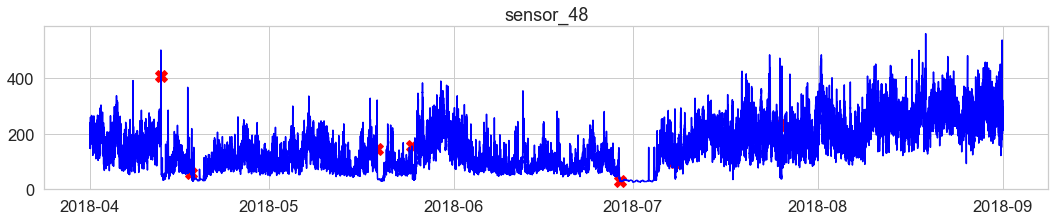

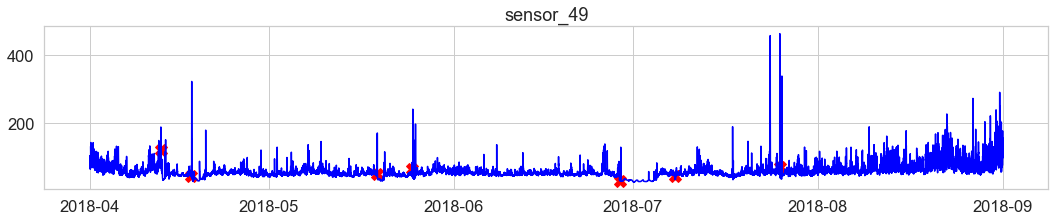

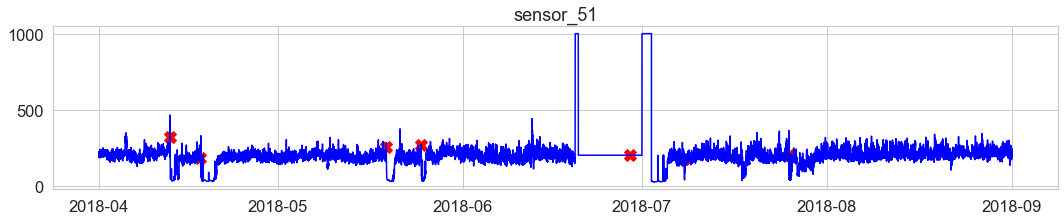

In [17]:
# Extract the readings from the BROKEN state of the pump
broken = sensor_df[sensor_df['machine_status'] == 'BROKEN']
# Extract the names of the numerical columns
sensor_df_2 = sensor_df.drop(['machine_status'], axis = 1)
names = sensor_df_2.columns
# Plot the time series for each sensor with BROKEN state marked with X in red color
for name in names:
    _ = plt.figure(figsize = (18,3))
    _ = plt.plot(broken[name], linestyle = 'none', marker = 'X', color = 'red', markersize = 12)
    _ = plt.plot(sensor_df[name], color = 'blue')
    _ = plt.title(name)
    plt.show()

### Data Pre-Processing and Dimensionality Reduction

#### Scaling the data

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
# dropping the target column from the dataframe
sensor_df_2 = sensor_df.drop(['machine_status'], axis = 1)
col_names = sensor_df_2.columns

# scaling
scaler = StandardScaler()
sensor_df_2_scaled = scaler.fit_transform(sensor_df_2)
sensor_df_2_scaled = pd.DataFrame(sensor_df_2_scaled, columns = col_names)

In [20]:
sensor_df_2_scaled.head()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51
0,0.231450,-0.151675,0.639386,1.057675,0.303443,0.177097,-0.042091,0.132586,0.181964,0.122858,...,-0.553995,-0.358970,-0.176799,-0.260520,1.759633,0.185888,-0.588642,0.086297,0.553138,-0.012402
1,0.231450,-0.151675,0.639386,1.057675,0.303443,0.177097,-0.042091,0.132586,0.181964,0.122858,...,-0.553995,-0.358970,-0.176799,-0.260520,1.759633,0.185888,-0.588642,0.086297,0.553138,-0.012402
2,0.180129,-0.072613,0.639386,1.093565,0.334786,0.008647,-0.082656,0.089329,0.207112,0.101892,...,-0.619939,-0.358970,-0.200379,-0.285516,1.737092,0.204388,-0.588641,0.061668,0.522906,0.009499
3,0.219228,-0.151675,0.627550,1.093564,0.260045,0.207693,-0.086035,0.185835,0.246628,0.136839,...,-0.619939,-0.384354,-0.271121,-0.310513,1.692010,0.204388,-0.588642,0.061668,0.507790,0.004024
4,0.182573,-0.138499,0.639386,1.093564,0.317909,0.184568,-0.069133,0.169195,0.246628,0.136839,...,-0.553995,-0.384354,-0.223959,-0.335509,1.714550,0.241389,-0.533219,0.089816,0.492674,-0.012402


#### Principal Component Analysis (PCA)

In [21]:
from sklearn.decomposition import PCA

In [22]:
pca = PCA()
pca.fit(sensor_df_2_scaled)

PCA()

In [23]:
pca.n_components_

50

In [24]:
pca.explained_variance_

array([1.74760811e+01, 9.35278852e+00, 4.30259700e+00, 2.75207467e+00,
       2.12098797e+00, 1.61628484e+00, 1.29483881e+00, 1.10243303e+00,
       1.06907417e+00, 9.02055074e-01, 7.80599752e-01, 6.85673465e-01,
       6.02402659e-01, 4.92349001e-01, 4.37341528e-01, 4.04895722e-01,
       3.72344140e-01, 3.46337840e-01, 3.12195682e-01, 2.88996162e-01,
       2.65377832e-01, 2.58145594e-01, 2.48398144e-01, 2.35094212e-01,
       2.15167915e-01, 2.04694153e-01, 1.97537465e-01, 1.93307142e-01,
       1.84640868e-01, 1.76911402e-01, 1.51093520e-01, 1.30694477e-01,
       1.12175266e-01, 1.06123883e-01, 1.01395250e-01, 9.92387122e-02,
       8.72280215e-02, 7.08254350e-02, 5.18182186e-02, 4.60467011e-02,
       4.46623753e-02, 3.98921840e-02, 1.93426472e-02, 1.45559174e-02,
       9.59002836e-03, 8.91491155e-03, 6.45757571e-03, 5.61851273e-03,
       1.69723632e-03, 1.23022909e-03])

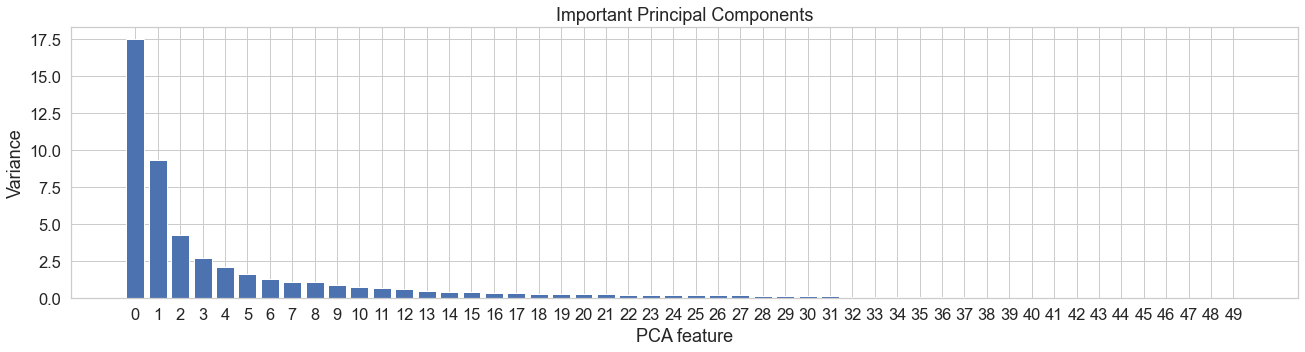

In [25]:
# Plot the Principal Components
features = range(pca.n_components_)
_ = plt.figure(figsize = (22,5))
_ = plt.bar(features, pca.explained_variance_)
_ = plt.xlabel('PCA feature')
_ = plt.ylabel('Variance')
_ = plt.xticks(features)
_ = plt.title('Important Principal Components')
plt.show()

In [26]:
# Calculate PCA with 2 components
pca = PCA(n_components = 2)
pComponents = pca.fit_transform(sensor_df_2_scaled)
principal_df = pd.DataFrame(data = pComponents, columns = ['pc1', 'pc2'])

In [27]:
principal_df.head()

,pc1,pc2
0,-0.046056,0.490524
1,-0.046056,0.490524
2,-0.186309,0.500354
3,-0.186651,0.538034
4,-0.142655,0.645878


#### Stationarity and Autocorrelation

In [28]:
# Stationarity
from statsmodels.tsa.stattools import adfuller

In [29]:
# Run Augmented - Dickey Fuller Test for first principal component
result = adfuller(principal_df['pc1'])
# Print p-value
print(result[1])

0.00014222614547132993


Since the p-value is less than significance level (0.05), hence, we can reject the null hypothesis that the time series is non-stationary for 1st principal component

In [30]:
# Run Augmented - Dickey Fuller Test for second principal component
result = adfuller(principal_df['pc2'])
# Print p-value
print(result[1])

1.9319529235722584e-10


Since the p-value is less than significance level (0.05), hence, we can reject the null hypothesis that the time series is non-stationary for 2nd principal component

In [31]:
# Autocorrelation for 1st principal component

In [32]:
# Compute the percentage change in values
pca1 = principal_df['pc1'].pct_change()
# Compute the autocorrelation
autocorrelation = pca1.dropna().autocorr()
print('Autocorrelation is:', autocorrelation)

Autocorrelation is: -7.216171630014715e-06


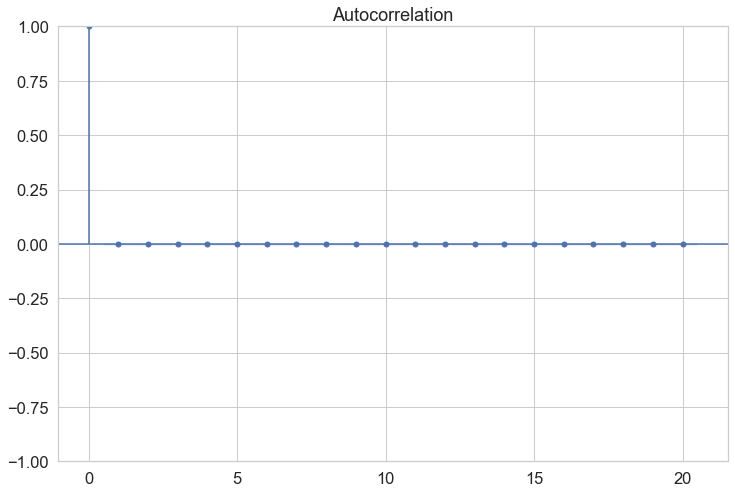

In [33]:
# Plot ACF
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(pca1.dropna(), lags = 20, alpha = 0.05)
plt.show()

In [34]:
# Autocorrelation for 2nd principal component

In [35]:
# Compute the percentage change in values
pca2 = principal_df['pc2'].pct_change()
# Compute the autocorrelation
autocorrelation = pca2.dropna().autocorr()
print('Autocorrelation is:', autocorrelation)

Autocorrelation is: -3.9015634828557926e-07


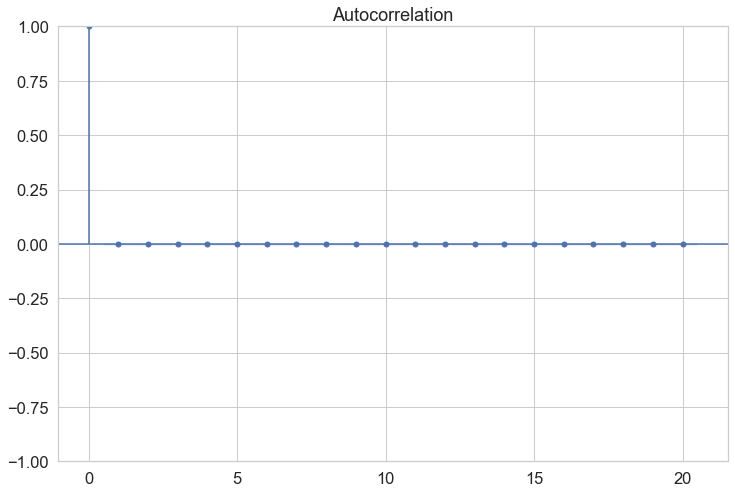

In [36]:
# Plot ACF
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(pca2.dropna(), lags = 20, alpha = 0.05)
plt.show()

Our new features from PCA are stationary and non-autocorrelated

### Modeling

#### Model - 1 : K-Means Clustering

In [37]:
# import k-means
from sklearn.cluster import KMeans

In [38]:
# initialize and fit k-means
kmeans = KMeans(n_clusters = 2, random_state = 13) # even though we know there are 3 classes (Normal, Broken and Recovering), we can broadly think of Broken and Recovering classes as non-normal

kmeans.fit(principal_df.values)

KMeans(n_clusters=2, random_state=13)

In [39]:
# prediction
labels = kmeans.predict(principal_df.values)

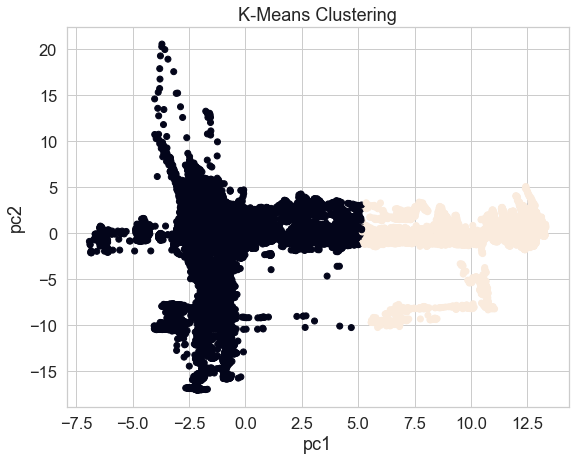

In [40]:
# Plotting the clusters
_ = plt.figure(figsize = (9,7))
_ = plt.scatter(principal_df['pc1'], principal_df['pc2'], c = labels)
_ = plt.xlabel('pc1')
_ = plt.ylabel('pc2')
_ = plt.title('K-Means Clustering')
plt.show()

In [41]:
# Write a function that calculates distance between each point and the centroid of the closest cluster

def getDistanceByPoint(data, model):
    """ Function that calculates the distance between a point and centroid of a cluster, 
            returns the distances in pandas series"""
    distance = []
    for i in range(0,len(data)):
        Xa = np.array(data.loc[i])
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.append(np.linalg.norm(Xa-Xb))
    return pd.Series(distance, index = data.index)

In [42]:
# Assume that 13% of the entire data set are anomalies
outliers_fraction = 0.13

# get the distance between each point and its nearest centroid. The biggest distances are considered as anomaly
distance = getDistanceByPoint(principal_df,kmeans)

# no. of observations that equate to the 13% of the entire dataset
number_of_outliers = int(outliers_fraction*len(distance))

# Take the minimum of the largest 13% of the distances as the threshold
threshold = distance.nlargest(number_of_outliers).min()

# Anomaly contains the anomaly result of the above method cluster (0 : normal , 1: anomaly)
principal_df['kmeans_anomaly'] = (distance >= threshold).astype(int)

In [43]:
principal_df.head()

,pc1,pc2,kmeans_anomaly
0,-0.046056,0.490524,0
1,-0.046056,0.490524,0
2,-0.186309,0.500354,0
3,-0.186651,0.538034,0
4,-0.142655,0.645878,0


In [44]:
principal_df['kmeans_anomaly'].value_counts()

0    191679
1     28641
Name: kmeans_anomaly, dtype: int64

#### Visualization over different sensors

In [45]:
dfBroken = sensor_df[sensor_df['machine_status'] == 'BROKEN']

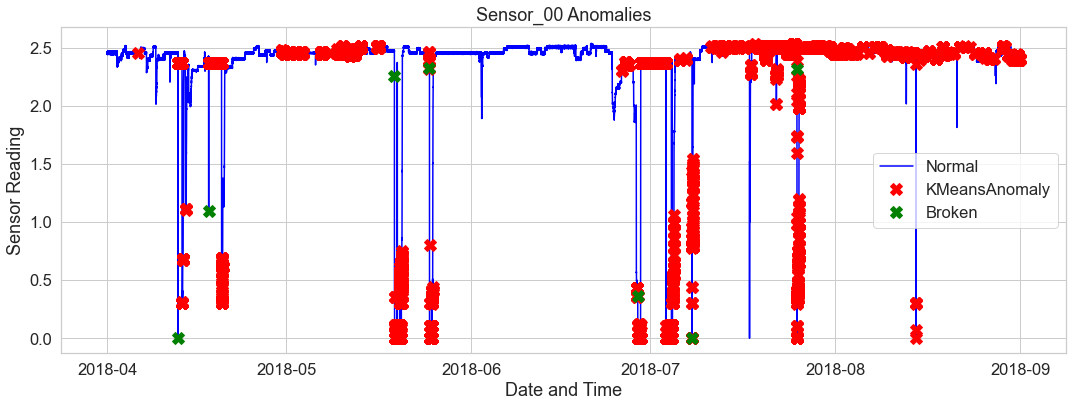

In [46]:
sensor_df['kmeans_anomaly'] = pd.Series(principal_df['kmeans_anomaly'].values, index = sensor_df.index)
a = sensor_df[sensor_df['kmeans_anomaly'] == 1] #anomaly
_ = plt.figure(figsize =(18,6))
_ = plt.plot(sensor_df['sensor_00'], color = 'blue', label = 'Normal')
_ = plt.plot(a['sensor_00'], color = 'red', linestyle = 'none', marker = 'X', markersize = 12, label = 'KMeansAnomaly')
_ = plt.plot(dfBroken['sensor_00'], color = 'green', linestyle = 'none', marker = 'X', markersize = 12, label = 'Broken')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('Sensor_00 Anomalies')
_ = plt.legend(loc = 'best')
plt.show()

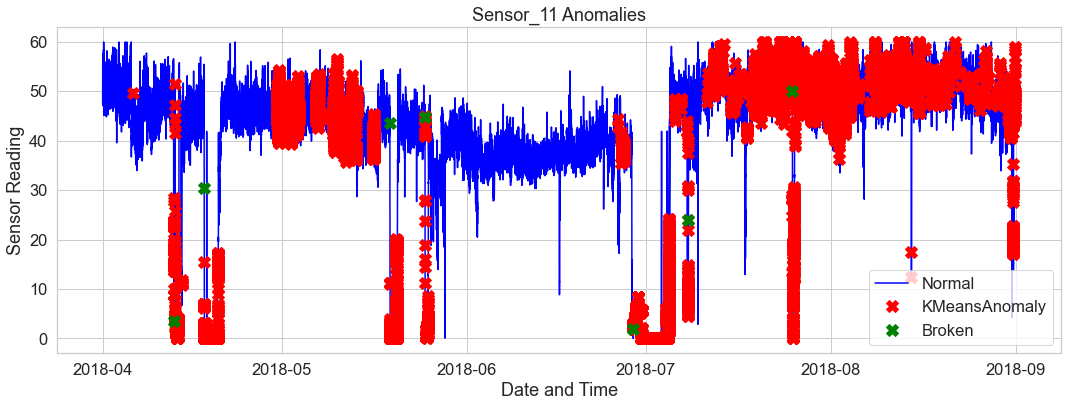

In [47]:
sensor_df['kmeans_anomaly'] = pd.Series(principal_df['kmeans_anomaly'].values, index = sensor_df.index)
a = sensor_df[sensor_df['kmeans_anomaly'] == 1] #anomaly
_ = plt.figure(figsize =(18,6))
_ = plt.plot(sensor_df['sensor_11'], color = 'blue', label = 'Normal')
_ = plt.plot(a['sensor_11'], color = 'red', linestyle = 'none', marker = 'X', markersize = 12, label = 'KMeansAnomaly')
_ = plt.plot(dfBroken['sensor_11'], color = 'green', linestyle = 'none', marker = 'X', markersize = 12, label = 'Broken')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('Sensor_11 Anomalies')
_ = plt.legend(loc = 'best')
plt.show()

We can see here there are fare few instances where the anomalies are detected right before the pump went into broken state.

#### Model 2 - Isolation Forest

In [48]:
# Import Isolation Forest
from sklearn.ensemble import IsolationForest

In [49]:
# fit and predict
model_if = IsolationForest(random_state = 13)

model_if.fit(principal_df.drop(['kmeans_anomaly'], axis = 1))

principal_df['if_anomaly'] = pd.Series(model_if.predict(principal_df.drop(['kmeans_anomaly'], axis = 1))) # (1: normal , -1: anomaly)

In [50]:
principal_df.head()

,pc1,pc2,kmeans_anomaly,if_anomaly
0,-0.046056,0.490524,0,1
1,-0.046056,0.490524,0,1
2,-0.186309,0.500354,0,1
3,-0.186651,0.538034,0,1
4,-0.142655,0.645878,0,1


In [51]:
principal_df['if_anomaly'].value_counts()

 1    172555
-1     47765
Name: if_anomaly, dtype: int64

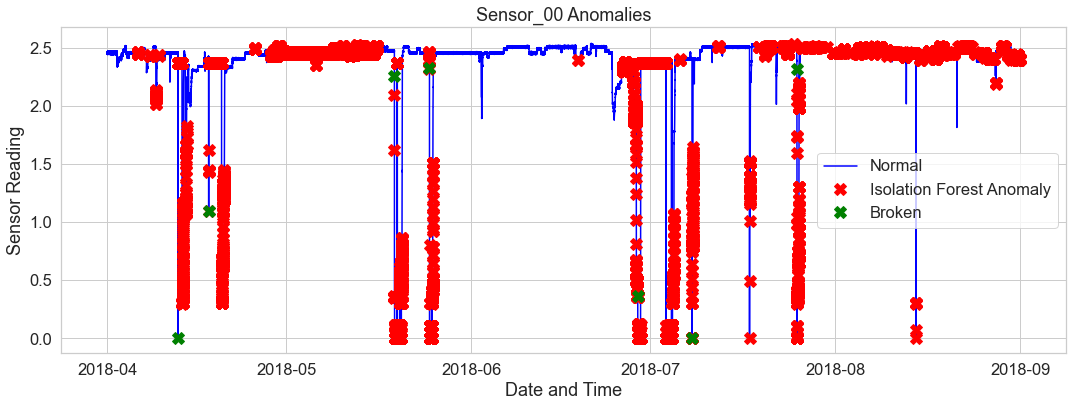

In [52]:
sensor_df['if_anomaly'] = pd.Series(principal_df['if_anomaly'].values, index = sensor_df.index)
a = sensor_df[sensor_df['if_anomaly'] == -1] #anomaly
_ = plt.figure(figsize =(18,6))
_ = plt.plot(sensor_df['sensor_00'], color = 'blue', label = 'Normal')
_ = plt.plot(a['sensor_00'], color = 'red', linestyle = 'none', marker = 'X', markersize = 12, label = 'Isolation Forest Anomaly')
_ = plt.plot(dfBroken['sensor_00'], color = 'green', linestyle = 'none', marker = 'X', markersize = 12, label = 'Broken')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('Sensor_00 Anomalies')
_ = plt.legend(loc = 'best')
plt.show()

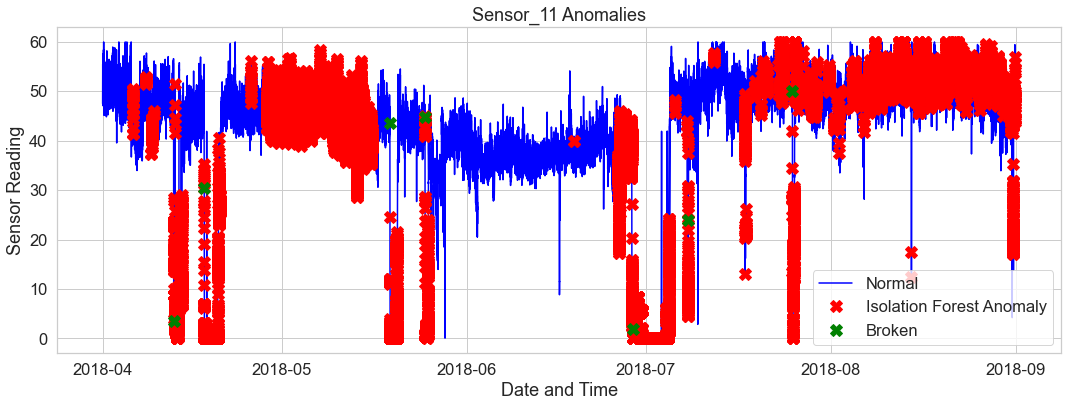

In [53]:
sensor_df['if_anomaly'] = pd.Series(principal_df['if_anomaly'].values, index = sensor_df.index)
a = sensor_df[sensor_df['if_anomaly'] == -1] #anomaly
_ = plt.figure(figsize =(18,6))
_ = plt.plot(sensor_df['sensor_11'], color = 'blue', label = 'Normal')
_ = plt.plot(a['sensor_11'], color = 'red', linestyle = 'none', marker = 'X', markersize = 12, label = 'Isolation Forest Anomaly')
_ = plt.plot(dfBroken['sensor_11'], color = 'green', linestyle = 'none', marker = 'X', markersize = 12, label = 'Broken')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('Sensor_11 Anomalies')
_ = plt.legend(loc = 'best')
plt.show()

### Evaluation

In [77]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, RocCurveDisplay, roc_curve, plot_roc_curve, auc
from sklearn.metrics import confusion_matrix

In [55]:
predictions = sensor_df[['machine_status', 'kmeans_anomaly', 'if_anomaly']]

In [56]:
predictions.head()

,machine_status,kmeans_anomaly,if_anomaly
index,,,
2018-04-01 00:00:00,NORMAL,0,1
2018-04-01 00:01:00,NORMAL,0,1
2018-04-01 00:02:00,NORMAL,0,1
2018-04-01 00:03:00,NORMAL,0,1
2018-04-01 00:04:00,NORMAL,0,1


In [57]:
# if_anomaly uniformity :- 1 => 0 (normal) ; -1 => 1 (anomaly)
predictions.loc[predictions['if_anomaly'] == 1,'if_anomaly'] = 0
predictions.loc[predictions['if_anomaly'] == -1, 'if_anomaly'] = 1

In [58]:
# turning machine_status numerical
predictions['machine_status'] = predictions['machine_status'].map({'NORMAL' : 0, 'RECOVERING' : 1, 'BROKEN' : 1})

#### K-Means Evaluation

In [83]:
# classification report
print('Classification Report of K-Means Clustering Anomaly Detection Model :')
print(classification_report(predictions['machine_status'].values, predictions['kmeans_anomaly'].values))

Classification Report of K-Means Clustering Anomaly Detection Model :
              precision    recall  f1-score   support

           0       0.99      0.93      0.96    205836
           1       0.47      0.93      0.62     14484

    accuracy                           0.93    220320
   macro avg       0.73      0.93      0.79    220320
weighted avg       0.96      0.93      0.94    220320



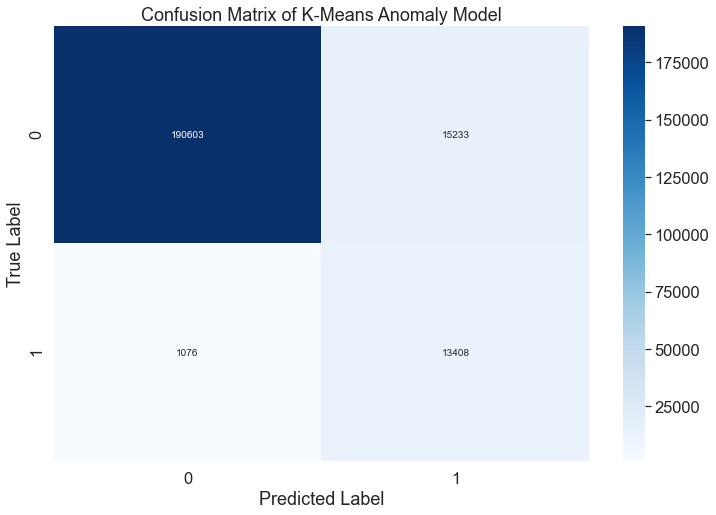

In [76]:
# confusion matrix
sns.heatmap(confusion_matrix(predictions['machine_status'].values, predictions['kmeans_anomaly'].values), annot = True, cmap = 'Blues', fmt="d")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of K-Means Anomaly Model')
plt.show()

In [78]:
# auc score
fpr, tpr , thresholds = roc_curve(predictions['machine_status'].values, predictions['kmeans_anomaly'].values)
roc_auc = auc(fpr,tpr)
print(round(roc_auc,2))

0.93


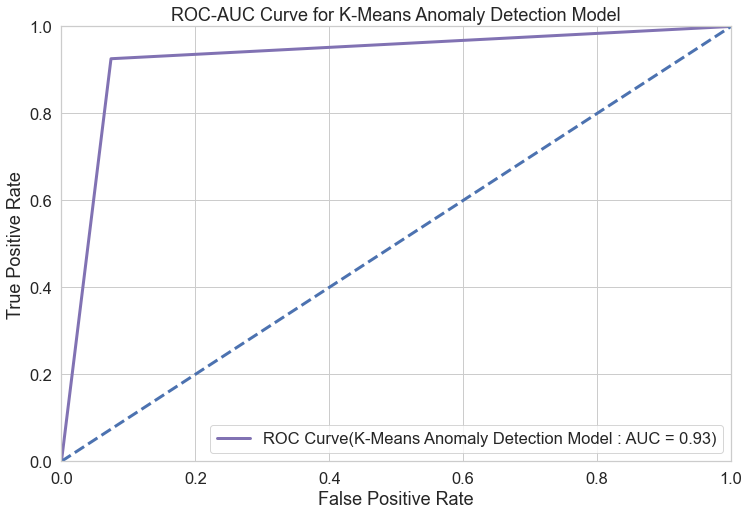

In [79]:
# roc_auc curve
plt.plot(fpr,tpr, linewidth=3, label = 'ROC Curve(K-Means Anomaly Detection Model : AUC = {})'.format(round(roc_auc,2)), color = 'm' )
plt.plot([0,1],[0,1], linewidth=3 , linestyle = '--', color = 'b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('ROC-AUC Curve for K-Means Anomaly Detection Model')
plt.legend()
plt.show()

#### Isolation Forest Evaluation 

In [82]:
# classification report
print('Classification Report of Isolation Forest Anomaly Detection Model :')
print(classification_report(predictions['machine_status'].values, predictions['if_anomaly'].values))

Classification Report of Isolation Forest Anomaly Detection Model :
              precision    recall  f1-score   support

           0       1.00      0.84      0.91    205836
           1       0.30      0.98      0.46     14484

    accuracy                           0.85    220320
   macro avg       0.65      0.91      0.68    220320
weighted avg       0.95      0.85      0.88    220320



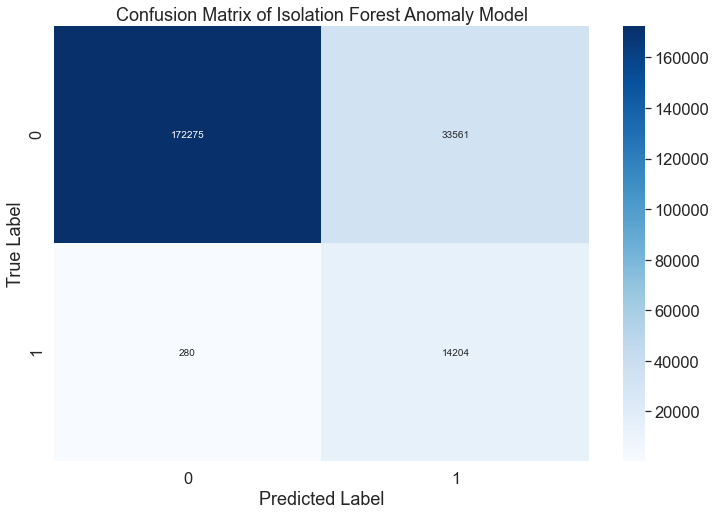

In [84]:
# confusion matrix
sns.heatmap(confusion_matrix(predictions['machine_status'].values, predictions['if_anomaly'].values), annot = True, cmap = 'Blues', fmt="d")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Isolation Forest Anomaly Model')
plt.show()

In [85]:
# auc score
fpr, tpr , thresholds = roc_curve(predictions['machine_status'].values, predictions['if_anomaly'].values)
roc_auc = auc(fpr,tpr)
print(round(roc_auc,2))

0.91


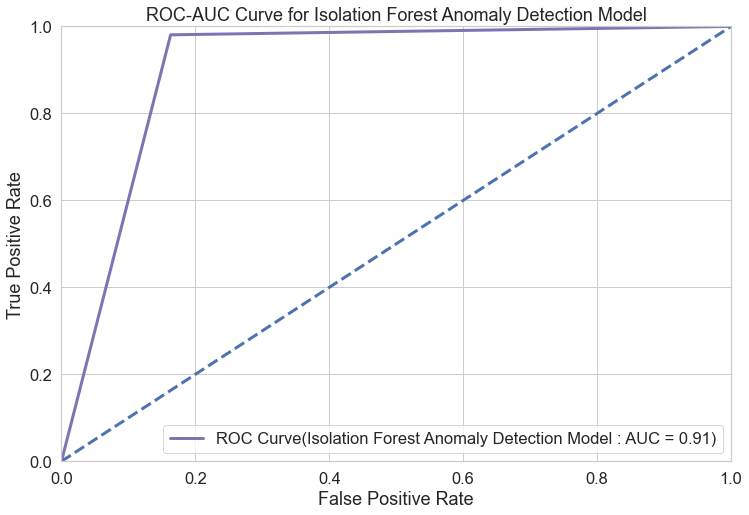

In [86]:
# roc_auc curve
plt.plot(fpr,tpr, linewidth=3, label = 'ROC Curve(Isolation Forest Anomaly Detection Model : AUC = {})'.format(round(roc_auc,2)), color = 'm' )
plt.plot([0,1],[0,1], linewidth=3 , linestyle = '--', color = 'b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('ROC-AUC Curve for Isolation Forest Anomaly Detection Model')
plt.legend()
plt.show()

### Conclusion on Model Selection

1. Here, in our case, the False Negatives will matter. That is,it will be more costly if the actual anomalous data (1) 
is predicted as non-anomalous (0).
2. In above two models, K-Means Anomaly Detection model has 1076 False Negative cases while Isolation Forest has only 280 such cases. 
3. Hence, Isolation Forest out-performs in having lesser False Negative Cases.
4. So does False Positive Cases won't matter ? That is, the model which predicts more actual normal data as anomalous, is not having any impact ? Well, the False Positive cases won't have any harm, but it will increase the man-power costs and other maintanance costs in checking the pump sensors.
5. In case of lesser False Positives, K-Means Anomaly Detection Model (15233 FPs') outperforms the Isolation Forest Model, having lesser False Positives (33561 FPs').
6. So, which model to choose? Well, it depends. We should have discussions with stakeholders to confirm what matters most to them, which is having bigger cost to them? Whether to allow some margin of False Positives or for False Negatives ? And then model can be decided accordingly.